# Homework 5

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Section 1: Harvard Case

*This section will not be graded, but it will be discussed in class.*

**Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

### Questions:

**1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?**

<span style="color:red">__*Answer 1.1:*__</span>

- Size Factor (Small minus Big -- SMB): Small cap minus big cap. Split stocks into 5 quantiles, long smallest quantile and short largest quantile (by market cap).
- Value Factor (High minus Low -- HML): High book-to-market ratio minus low book-to-market ratio. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by book-to-market ratio).
    - Metrics used: Forward price-to-earnings ratio, Enterprise value to operating cash flow ratio, Price-to-book ratio** (inverse of B/M)
- Quality Factor (Robust minus Weak -- RMW): Robust operating profitability minus weak operating profitability. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by operating profitability).
    - Metrics used: Return on equity, debt to equity, Earnings variability
- Investment Factor (Conservative minus Aggressive -- CMA): Conservative investment minus aggressive investment. Split stocks into 5 quantiles, long lowest quantile and short lowest highest (by investment).
- Momentum (Up minus Down -- UMD): Up minus down. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by returns in previous year).
    - Metrics used: Stock’s returns for the previous 6 to 12 months, standardized by the stock’s volatility.



**2. Is the factor portfolio...**
* long-only
* long-short
* value-weighted
* equally-weighted


<span style="color:red">__*Answer 1.2:*__</span>

The factor portfolio is long-short.



**4. What steps are taken in the factor construction to try to reduce the correlation between the factors?**

<span style="color:red">__*Answer 1.4:*__</span>

The portfolio is breaking these individual factors up into quantiles to long and short. They are longing the key sub-factor like small cap stocks and going short the inverse sub-factor like big (large) cap stocks. The purpose of this is to attempt to hedge away as much of the market factor as possible. It is trying to only be exposed to the underlying factor, which in this case is small cap stocks, while maintaining low correlation to the other factors.

In summary, picking distinct metrics, going long-short (to represent low correlation with the market which is long only).



**5. What is the point of figures 1-6?**

<span style="color:red">__*Answer 1.5:*__</span>

The point of figures 1-6 is to depict the relationship between the 5 quantiles of returns for each factor. These figures are showing why they are going long one quantile and going short the other.



**6. How is a “smart beta” ETF different from a traditional ETF?**

<span style="color:red">__*Answer 1.6:*__</span>

Differences between "smart beta" ETFs and tradional ETFs:

"smart beta":
- combination of passive and active investing
- passively mimic factor indexes
- active because their weights deviate from standard market cap weights
- will be long-short

traditional:
- market cap weighted
- strictly passive
- typically long-only

Smart beta ETFs are a combination of passive and active investing. Whereas a passive ETF tracks an index, and is almost always long-only, a smart beta ETF will track a factor index, and will thus be long-short. This is compared to just market cap weighted ETFs (passive).



**7. Is it possible for all investors to have exposure to the “value” factor?**

<span style="color:red">__*Answer 1.7:*__</span>

It is not possible for all investors to have exposure to the "value" factor because as Cliff Asness has said, "A portfolio that deviates from market weights ... must be balanced by other investors who are willing to take the other side of those bets. For example, for every value investor, who tilts toward or selects cheap value stocks, there must be an investor on the other side who is underweighting value and overweighting expensive, growth stocks. Hence, as everything must add up to the market-weighted portfolio, everyone at once cannot hold or tilt toward value at the same time." - from page 9 of the case study



**8. How does factor investing differ from traditional diversification?**

<span style="color:red">__*Answer 1.8:*__</span>

A factor investor believes that all risk-premium is related to a limited set of factors. Therefore, they see no reason to invest in particular assets, but only in the factors themselves.

Traditional diversification is done using assets. Factors investors can also use MV optimization and aim to diversify. Nonetheless, they will do it with factors (instead of individual stocks, bonds, currencies, etc...).




If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns

1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics. • mean
• volatility
• Sharpe

2. Based on the factor statistics above, answer the following.
(a) Does each factor have a positive risk premium (positive expected excess return)? (b) How have the factors performed since the time of the case, (2015-present)?

3. Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

4. Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

What do you conclude about the importance or unimportance of these styles?

In [1]:
# Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from typing import Union, List, Callable

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 30)

import statsmodels.api as sm
from scipy.stats import t

import os
import sys

parent_path = os.path.dirname(os.getcwd()) # Get parent path (if using .ipynb file)
# parent_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) # Get parent path (if using .py file)
os.chdir(parent_path) # Set parent path as working directory (for reading and writing files)
sys.path.insert(0, parent_path) # Add parent path to system path (for importing modules)

import utils.portfolio_management_functions as pm

In [2]:
# Check data in the file (sheets, columns, data):
INFILE = "data/factor_pricing_data.xlsx"
try:
    pm.read_excel_default(INFILE, print_sheets = True)
except FileNotFoundError as e:
    print(f'{e}.\nCheck file in {parent_path}')

Sheet name: descriptions
Columns: Unnamed: 0, Name, Unit, Construction, Description
  Unnamed: 0    Name           Unit         Construction                                        Description
0        MKT  Market  Excess Return  Market-cap-weighted                                        US Equities
1        SMB    Size  Excess Return      Small Minus Big             Long small stocks and short big stocks
2        HML   Value  Excess Return       High Minus Low  Long value (high book-to-market) stocks and sh...
----------------------------------------------------------------------


Sheet name: factors (excess returns)
Columns: Date, MKT, SMB, HML, RMW, CMA, UMD
        Date     MKT     SMB     HML     RMW     CMA     UMD
0 1980-01-31  0.0551  0.0183  0.0175 -0.0170  0.0164  0.0755
1 1980-02-29 -0.0122 -0.0157  0.0061  0.0004  0.0268  0.0788
2 1980-03-31 -0.1290 -0.0693 -0.0101  0.0146 -0.0119 -0.0955
----------------------------------------------------------------------


Sheet name: p

In [3]:
# Import data from the file:
description = pd.read_excel(INFILE, sheet_name='descriptions',index_col=0)
factors_returns = pd.read_excel(INFILE, sheet_name='factors (excess returns)',index_col=0)
portfolios_returns = pd.read_excel(INFILE, sheet_name='portfolios (excess returns)',index_col=0)

display(description)

,Name,Unit,Construction,Description
MKT,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RMW,Profitability,Excess Return,Robust Minus Weak,Long profitability (income statement) and shor...
CMA,Investment,Excess Return,Conservative Minus Agressive,Long stocks with low (conservative) investment...
UMD,Momentum,Excess Return,Up Minus Down,Long stocks that have high recent returns and ...
RF,Risk-free rate,Total Return,Tbills,NaN


<span style="color:red">__*Answer 2.1:*__</span>

,Annualized Mean,Annualized Vol,Annualized Sharpe
MKT,0.0863,0.1569,0.5499
SMB,0.0083,0.1019,0.0817
HML,0.0258,0.1100,0.2346
RMW,0.0471,0.0832,0.5660
CMA,0.0295,0.0731,0.4041
UMD,0.0627,0.1546,0.4057


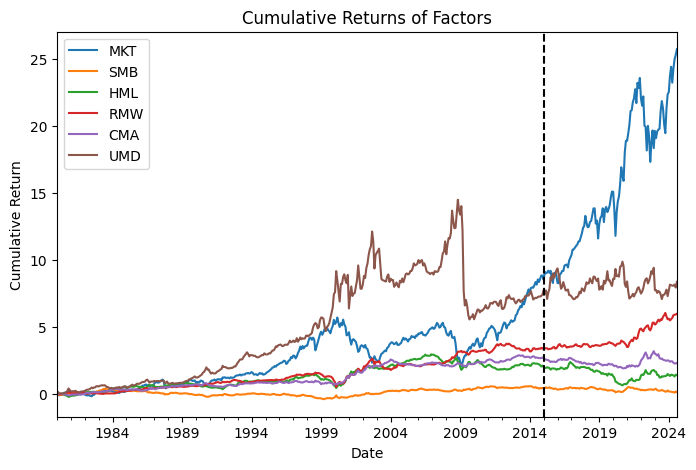

In [4]:
# Calculate the factor returns statistics:
factor_stats = pm.calc_returns_statistics(factors_returns,
                                    provided_excess_returns=True,
                                    annual_factor=12,
                                    var_quantile = 0.05,
                                    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe'])
display(factor_stats)

fig, ax = plt.subplots(figsize=(8, 5))
cum_rets = (1 + factors_returns).cumprod() - 1
cum_rets.plot(ax=ax)
ax.axvline('2015', color='k', linestyle='--')
ax.set_title('Cumulative Returns of Factors')
ax.set_ylabel('Cumulative Return')
ax.set_xlabel('Date')
plt.show()


In [5]:
  # Calculate the factor returns statistics:
factor_stats = pm.calc_returns_statistics(factors_returns,
                                    provided_excess_returns=True,
                                    annual_factor=12,
                                    var_quantile = 0.05,
                                    timeframes={
                                        "1980-2001": ["1980", "2001"],
                                        "2002-2014": ["2002", "2014"],
                                        "2015-2024": ["2015", "2024"]

                                    },
                                    keep_columns=['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe'])
display(factor_stats)

,Annualized Mean,Annualized Vol,Annualized Sharpe
MKT (1980-2001),0.0830,0.1595,0.5202
SMB (1980-2001),0.0038,0.1094,0.0349
HML (1980-2001),0.0518,0.1124,0.4614
RMW (1980-2001),0.0497,0.0908,0.5471
CMA (1980-2001),0.0463,0.0777,0.5954
UMD (1980-2001),0.1110,0.1502,0.7387
MKT (2002-2014),0.0693,0.1506,0.4605
SMB (2002-2014),0.0366,0.0854,0.4292
HML (2002-2014),0.0142,0.0839,0.1694
RMW (2002-2014),0.0399,0.0769,0.5189


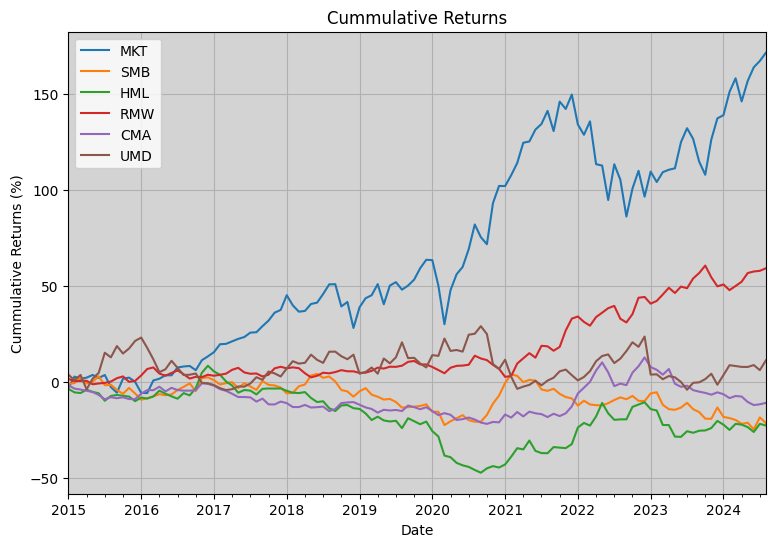

In [6]:
pm.calc_cummulative_returns(factors_returns.loc['2015':], 'Factors Cumulative Returns', fig_size=6)

<span style="color:red">__*Answer 2.2:*__</span>

__*(a)*__ All factors have positive risk-premium in the entire sample.

__*(b)*__ The same is true in the subsamples specified in HW4 (from 1980 to 2001 and 2002 to 2024). Nonetheless, since 2015, the premioum of the size factor (SMB), value factor (HML), and investment factor (CMA) has been negative: -1.95%, -1.79%, and -0.84% annualized, respectively. On the other hand, the market factor MKT has had the best performance (11.7% annualized expected excess return, with a volatility of 16%). The profitability factor (RMW) also had a good performance (5.1% annualized expected excess return, with a volatility of 7%, delivering a sharpe ratio of 0.69, close to the MKT sharpe of 0.73). The performance of the momentum factor (UMD) has been positive as well, but less significant than the previous two, with an annualized expected excess return of 2.1%, and a volatility of 14%, delivering a sharpe ratio of 0.15.

<span style="color:red">__*Answer 2.3:*__</span>

The highest correlation (0.6784) is between HML and CMA
The lowest correlation (-0.4141) is between RMW and SMB


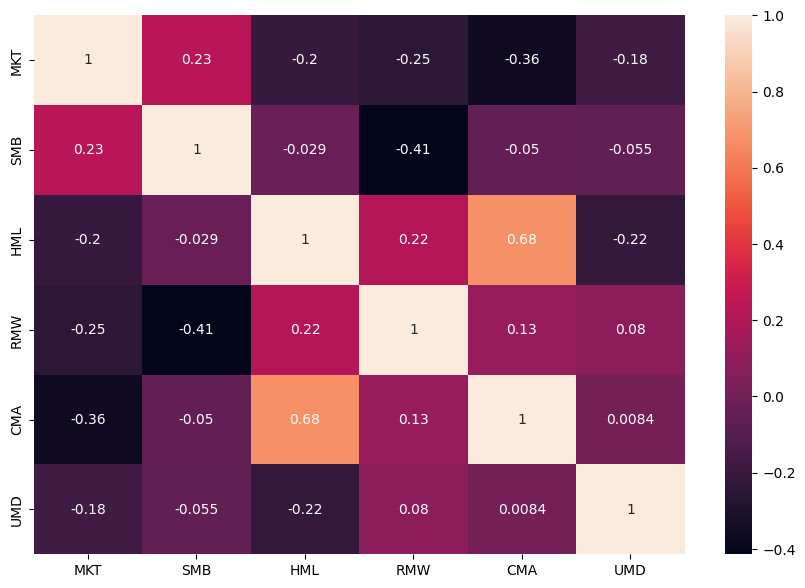

In [7]:
pm.calc_correlations(factors_returns)

- The factor construction method did succeed in keeping correlations small.
- Most of the factors have low correlation with each other (below 0.23, with some reaching -0.4), except for the HML (value factor) and CMA (investment factor), which have a correlation of 0.7.
    - This is consistent with the idea that the HML factor is somewhat redundant in the 5-factor model.
    - Perhaps, if the value factor were built differently, the CMA factor would not be necessary at all.
    - Nonetheless, one should be careful to drop HML. Prior to doing that, it is necessary to check the cross-sectional test with and without the Value factor and calculate the weights of the tangency portfolio. If HML shows relevant results, it should not be dropped and, thus, is not redundant.

<span style="color:red">__*Answer 2.4:*__</span>

,Tangency Portfolio
MKT,0.2098
SMB,0.0773
HML,-0.0421
RMW,0.3133
CMA,0.3390
UMD,0.1028


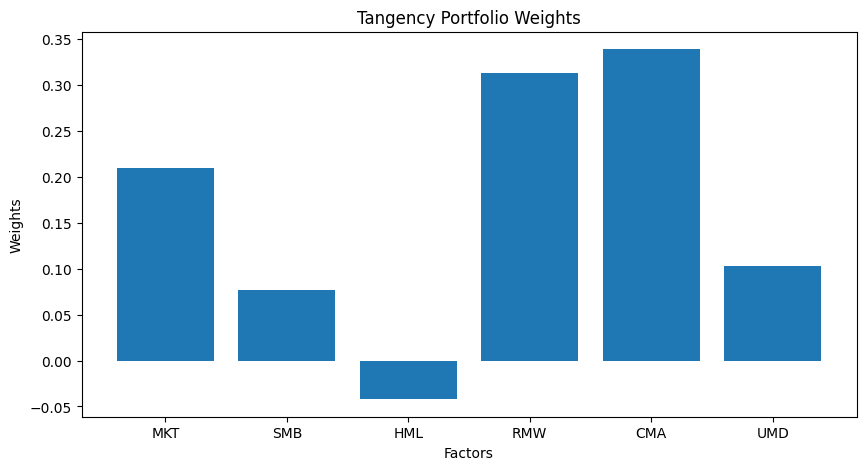

In [8]:
tangent_factor_weights = pm.calc_tangency_port(factors_returns, annual_factor=12)
display(tangent_factor_weights)
plt.figure(figsize=(10, 5))
plt.bar(tangent_factor_weights.index, tangent_factor_weights.iloc[:, 0].values)
plt.xlabel("Factors")
plt.ylabel("Weights")
plt.title("Tangency Portfolio Weights")
plt.show()

- Based on the tangency portfolio, which represents the optimum risky portfolio, the most important factors seems to be the market factor (MKT), the profitability factor (RMW), and the investment factor (CMA). The least important factors are the value factor (HML), and the size factor (SMB).
    - It is worth noting that RMW is the second most important factor, even though it has the third lowest average return, probably due to its high Sharpe ratio.

- In the graphics above, we can also see that Market is not only weighted more heavily due to its good Sharpe but also due to its average correlation with other factors. While all other factors are long-short, Market is the only factor long-only, making it different from the rest.

,Tangency Portfolio
MKT,0.3655
SMB,-0.0324
HML,0.3562
UMD,0.3107


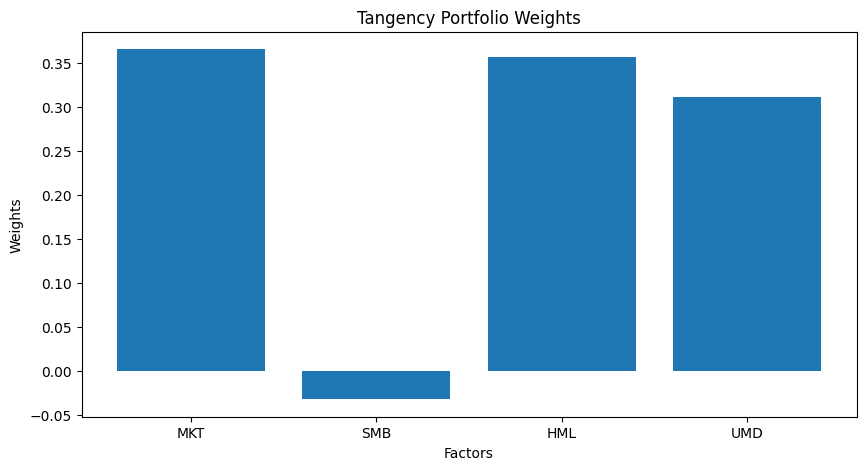

In [9]:
tangent_factor_weights = pm.calc_tangency_port(factors_returns[['MKT', 'SMB', 'HML', 'UMD']], annual_factor=12)
display(tangent_factor_weights)
plt.figure(figsize=(10, 5))
plt.bar(tangent_factor_weights.index, tangent_factor_weights.iloc[:, 0].values)
plt.xlabel("Factors")
plt.ylabel("Weights")
plt.title("Tangency Portfolio Weights")
plt.show()

- After re-calculating the tangency portfolio, but this time only including MKT, SMB, HML, and UMD, the MKT and UMD factors got higher tangency weights, as well as the HML factor portfolio which was initially slightly negative and now is around 36%, which could be partially because of its relatively high correlation with the CA factor (as previously noted), that initially had 34% but now was removed. SMD factor decresed its weight from a low 8% to even less significant -3%.

- We can conclude that the market factor will always have a high weight in the tangency portfolio, as it is among the most important factor in the model. The value factor is also important, but not as much when included the investment factor, since they are highly correlated and the CMA factor has had a better performance throughout the samples. The momentum factor is also important, but not as much as the market and value factor, given its lower risk premium, however, because of its low correlation (near zero) with all the other factors, it ends up having a high importance, especially when the investment and profitability factors are not included. The size factor is the least important factor in the model, probably because of its low risk premium and not sufficiently low correlation with the other factors.

- We see that, although the MKT factor is the most important, even though it is definitely the best as a linear factor decomposition, for pricing, the tangency portfolio weights show that it is not sufficient by itself. The other factors are still useful, even though they have lower mean returns, because they have low correlation with the other factors, which makes them important in the tangency portfolio to achieve the maximum sharpe ratio.

***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

We are not saying this is “the” AQR model, but it is a good illustration of their most publicized factors: value, momentum, and more recently, profitability.

For instance, for the AQR model is...

![](../refs/LFP-4-factors.png)

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

![](../refs/LFD-4-factors.png)

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
* For each regression, report the estimated α and r-squared.
* Calculate the mean-absolute-error of the estimated alphas.
* If the pricing model worked, should these alpha estimates be large or small? Why?
* Based on your MAE stat, does this seem to support the pricing model or not?

2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?
   
3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

4. This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

5. We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.
* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

***

<span style="color:red">__*Answer 3.1:*__</span>

In [10]:
CAPM_FACTORS = ['MKT']
FF3_FACTORS = ['MKT', 'SMB', 'HML']
FF5_FACTORS = ['MKT', 'SMB', 'HML', 'RMW', 'CMA']
AQR_FACTORS = ['MKT', 'HML', 'RMW', 'UMD']
ALL_FACTORS = ['MKT', 'SMB', 'HML', 'RMW', 'CMA', 'UMD']

FACTOR_MODELS = {
    'CAPM': CAPM_FACTORS,
    'FF3': FF3_FACTORS,
    'FF5': FF5_FACTORS,
    'AQR': AQR_FACTORS
}

portfolios_returns.columns = [f'r{i+1}' for i in range(len(portfolios_returns.columns))]

In [11]:
aqr_regression_stats = pm.calc_regression(portfolios_returns,
                                          factors_returns[AQR_FACTORS],
                                          annual_factor=12,
                                          p_values=False,
                                          rse_mae=False,
                                          tracking_error=False)

print('AQR Regression Statistics: ')
display(aqr_regression_stats)

AQR Regression Statistics: 


,R-Squared,Observed Mean,Observed Std Dev,Alpha,Annualized Alpha,Beta (MKT),Beta (HML),Beta (RMW),Beta (UMD)
r1,0.3392,0.0074,0.0629,0.0006,0.0077,0.8368,0.1843,-0.0112,0.0804
r2,0.4642,0.0080,0.0435,0.0006,0.0069,0.6791,0.1836,0.4893,0.0424
r3,0.3084,0.0090,0.0634,0.0014,0.0172,0.7839,0.2042,0.4904,-0.0848
r4,0.4208,0.0094,0.0489,0.0014,0.0171,0.7214,0.0384,0.5846,0.0873
r5,0.2735,0.0112,0.0644,0.0029,0.0353,0.7377,0.2588,0.6552,-0.0283
r6,0.5083,0.0049,0.0719,-0.0031,-0.0373,1.1161,-0.0148,0.2120,-0.1566
r7,0.6165,0.0100,0.0763,0.0025,0.0305,1.2509,-0.0198,-0.0947,-0.2232
r8,0.6868,0.0064,0.0597,-0.0025,-0.0294,1.1123,0.2570,0.1937,-0.0794
r9,0.5584,0.0067,0.0442,-0.0007,-0.0081,0.7518,-0.0009,0.4805,0.0161
r10,0.6183,0.0077,0.0648,-0.0015,-0.0182,1.1151,0.0520,0.5505,-0.1989


In [12]:
print('AQR Regression: \n')
print(f'Mean Absolute Error (MAE) of the Alphas: {aqr_regression_stats['Alpha'].abs().mean():.4%}')
print(f'\nMean Absolute Error (MAE) of the Annualized Alphas: {aqr_regression_stats['Annualized Alpha'].abs().mean():.4%}')

AQR Regression: 

Mean Absolute Error (MAE) of the Alphas: 0.1916%

Mean Absolute Error (MAE) of the Annualized Alphas: 2.2993%


- If the pricing model worked, these alpha estimates be small ("statistically zero"), because all risk premium of any asset should be associated with the risk premium of the pricing factors.
    - A MAE not statistically zero shows that there is positive (or negative) excess return not associated with the model's pricing factors.


- In the time-series, the annualized MAE is 2.3%, which does not support the idea that the pricing model is able to capture all systematic risk.
    - This mean that, on average, assets have taken 2.3% excess return uncorrelated with any of the pricing factors.

<span style="color:red">__*Answer 3.2:*__</span>

In [13]:
port_annualized_mean_returns = portfolios_returns.mean() * 12 # Mean excess returns of the portfolios (25 data points)

factor_models_mae_comparison = pd.DataFrame(columns=['TS Annualized MAE', 'CS Annualized MAE', 'CS R-squared', 'CS Intercept'], index=FACTOR_MODELS.keys())

for name, factors in FACTOR_MODELS.items():
    ts_regression_stats = pm.calc_regression(portfolios_returns,
                                          factors_returns[factors],
                                          p_values=False,
                                          annual_factor=12)
    
    cs_regression_stats = pm.calc_cross_section_regression(
        Y=port_annualized_mean_returns,
        X=ts_regression_stats.filter(regex='Beta'),
        p_values=False,
    )

    ts_annualized_mae = ts_regression_stats['Annualized Alpha'].abs().mean()
    cs_annualized_mae = cs_regression_stats.loc['MAE'].values[0]
    cs_r_squared = cs_regression_stats.loc['R-Squared'].values[0]
    cs_intercept = cs_regression_stats.loc['Intercept'].values[0]
    factor_models_mae_comparison.loc[name,:] = [ts_annualized_mae, cs_annualized_mae, cs_r_squared, cs_intercept]

factor_models_mae_comparison

,TS Annualized MAE,CS Annualized MAE,CS R-squared,CS Intercept
CAPM,0.0204,0.0153,0.0055,0.0854
FF3,0.0240,0.0119,0.3710,0.0622
FF5,0.0314,0.0115,0.4126,0.0531
AQR,0.0230,0.0136,0.2119,0.0694


<span style="color:red">__*RELEVANT:*__</span>

- When comparing the MAE of the time-series test, we can see that the CAPM has the lowest MAE (2.04%), followed by the AQR model (2.3%), the FF 3-Factor Model (2.4%), and the FF 5-Factor Model (3.14%).
    - That means that, in the time series, adding the other factors doens't seem to improve the model's mean absolute error, which are the alphas. It does improve the R-squared (which is not what we are testing here - they would be relevant for hedging, though), but not the MAE.
    Adding more factors doesn't need to fit better with smaller MAE, it might actually be really just fitting the factors perfectly, which means the test assets could fit worse and have a higher error.

- However, when performing the cross-sectional test, we can see that, by adding more factors, we fit better:
    - The time-series test just tries to fit through the factors and the risk-free rate, so the fit could get worse when adding more factors, because we are just looking for the time-series alphas (there is no reason for the alpha to go towards zero as I add more factors).
    - However, in the cross-sectional test, if I add more and more factors, I am just checking how well this extra regression fits the assets.

- And so, in the cross-sectional test, we can see that the MAE is higher for the CAPM, and its R-squared is the worse, below 10%, with the best being FF5, then FF3, and AQR.
- The intercept in the cross-sectional regression is the biggest for CAPM as well, while we wanted it to be zero, if it was a perfect model.
    - This shows that, CAPM is the model that least explain the expected returns on the assets.

<span style="color:red">__*Answer 3.3:*__</span>

In [20]:
factors_returns

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112
...,...,...,...,...,...,...
2024-04-30,-0.0467,-0.0256,-0.0052,0.0148,-0.0030,-0.0042
2024-05-31,0.0434,0.0076,-0.0166,0.0298,-0.0307,-0.0002
2024-06-30,0.0277,-0.0437,-0.0331,0.0051,-0.0178,0.0090


In [14]:
tangent_weights_list = []

factor_models_all = FACTOR_MODELS.copy()
factor_models_all.update({'All Fators': ALL_FACTORS})

for name, factors in factor_models_all.items():
    tangent_weights = pm.calc_tangency_port(factors_returns[factors], annual_factor=12)
    tangent_weights.rename(columns={'Tangency Portfolio': f'{name} Weights'}, inplace=True)
    tangent_weights_list.append(tangent_weights)

# Concatenate all tangent weights DataFrames along the columns
tangent_models_weights = pd.concat(tangent_weights_list, axis=1)

# Display the result with NaNs filled as zeros
display(tangent_models_weights.fillna(0))

,CAPM Weights,FF3 Weights,FF5 Weights,AQR Weights,All Fators Weights
MKT,1.0000,0.5929,0.2162,0.2712,0.2098
SMB,0.0000,-0.0756,0.0913,0.0000,0.0773
HML,0.0000,0.4827,-0.1165,0.1745,-0.0421
RMW,0.0000,0.0000,0.3747,0.3705,0.3133
CMA,0.0000,0.0000,0.4343,0.0000,0.3390
UMD,0.0000,0.0000,0.0000,0.1837,0.1028


- In all factor models, the size factor (SMB) presented a small allocation when compared to other factors in the tangency portfolios, which seems like it is not important for pricing. The market factor (MKT), as well as the profitability (RMW) and investment (CMA) factors, were the most important factors in the tangency portfolio, which seems like they are important for pricing. The CMA factor could be substituted by or combined with the value (HML) (which is also important). The momentum factor (UMD) was also important, but not as much as the market and value factors, given its lower risk premium, however, because of its low correlation (near zero) with all the other factors, it ends up having a high importance, especially when the investment and size factors are not included (AQR model).

- The SMB factor seems particularly unimportant.
    - In both factor models in which it is included, it has ~10% of absolute average return.
- For the FF3, the addition of momentum is particularly important. For the FF5 is not that important. We can validate that by adding the UMD factor to the FF5 and the FF3.

<span style="color:red">__*Answer 3.4:*__</span>

In [15]:
ts_r_squared_summary = pd.DataFrame({})

for name, factors in FACTOR_MODELS.items():
    ts_regression_stats = pm.calc_regression(portfolios_returns,
                                          factors_returns[factors],
                                          p_values=False,
                                          annual_factor=12)
    
    ts_r_squared_summary.loc[name, 'R-Squared'] = ts_regression_stats['R-Squared'].mean()

ts_r_squared_summary.index = [index + ' Model' for index in list(ts_r_squared_summary.index)]
display(ts_r_squared_summary)

,R-Squared
CAPM Model,0.5261
FF3 Model,0.5715
FF5 Model,0.5960
AQR Model,0.5749


- These models do not lead to high r-squares, but because they are relatively high, that  means that they would be reasonable in Linear Factor Decomposition of the assets.
- The CAPM model has the lowest r-squared, which is expected, while the FF 5-Factor Model has the highest r-squared, which is also expected in sample, given that it has more factors to explain the risk premia of the portfolios, even though it is more prone to overfitting.

<span style="color:red">__*Answer 3.5:*__</span>

In [16]:
ts_regression_stats = pm.calc_regression(portfolios_returns,
                                          factors_returns[factors],
                                          p_values=False,
                                          annual_factor=12)
    
betas = ts_regression_stats.filter(regex='Beta')
betas.rename(columns=lambda x: x.replace('Beta (', ''), inplace=True)
betas.rename(columns=lambda x: x.replace(')', ''), inplace=True)
cs_regression_stats = pm.calc_cross_section_regression(
    Y=port_annualized_mean_returns,
    X=betas,
    p_values=False,
)
cs_regression_stats

,Cross-Sectional
R-Squared,0.2119
Observed Mean,0.0916
Observed Std Dev,0.0199
MAE,0.0136
RSE,0.0185
Intercept,0.0694
Lambda (MKT),0.0232
Lambda (HML),-0.0325
Lambda (RMW),0.0228
Lambda (UMD),0.0107


In [17]:
factor_premia_comparison = pd.DataFrame({})

for name, factors in FACTOR_MODELS.items():
    ts_regression_stats = pm.calc_regression(portfolios_returns,
                                          factors_returns[factors],
                                          p_values=False,
                                          annual_factor=12)
    
    betas = ts_regression_stats.filter(regex='Beta')
    betas.rename(columns=lambda x: x.replace('Beta (', ''), inplace=True)
    betas.rename(columns=lambda x: x.replace(')', ''), inplace=True)
    cs_regression_stats = pm.calc_cross_section_regression(
        Y=port_annualized_mean_returns,
        X=betas,
        p_values=False,
    )

    for factor in factors:
        factor_premia_comparison.loc[name, factor] = cs_regression_stats.loc[f'Lambda ({factor})', :].values[0]


historical_factor_premia = pd.DataFrame({'Historical':factors_returns.mean() * 12})
factor_premia_comparison = pd.concat([historical_factor_premia.T, factor_premia_comparison], axis=0)

factor_premia_comparison.fillna(0, inplace=True)
factor_premia_comparison.columns = [f'{column} Premia' for column in factor_premia_comparison.columns]
factor_premia_comparison.index = [index + ' Model' for index in list(factor_premia_comparison.index)]

factor_premia_comparison = factor_premia_comparison.T
print('Factor Risk Premia: ')
display(factor_premia_comparison)

Factor Risk Premia: 


,Historical Model,CAPM Model,FF3 Model,FF5 Model,AQR Model
MKT Premia,0.0863,0.0062,0.0400,0.0469,0.0232
SMB Premia,0.0083,0.0000,-0.0433,-0.0464,0.0000
HML Premia,0.0258,0.0000,-0.0196,-0.0267,-0.0325
RMW Premia,0.0471,0.0000,0.0000,0.0243,0.0228
CMA Premia,0.0295,0.0000,0.0000,-0.0217,0.0000
UMD Premia,0.0627,0.0000,0.0000,0.0000,0.0107


- The time-series estimates are consistently higher, especially for MKT (0.0863) and UMD (0.0627), than the estimates using cross-sectional regression in each model. For the SMB, the time series suggests a premia near 0.8 annually, but the FF-3 and FF-5 models suggests a risk premia around ~ -4.5%. The CAPM estimate of the market factor is also very different than the time series one, indicating that the CAPM has little power in estimating asset/portfolio risk premia based on the market portfolio, casting doubt in the validity of this model.
- This discrepancy suggests that cross-sectional models, capture different dynamics than the straightforward historical averages used in time-series analysis through the covariance matrix.

In [18]:
factor_models_mae_comparison

,TS Annualized MAE,CS Annualized MAE,CS R-squared,CS Intercept
CAPM,0.0204,0.0153,0.0055,0.0854
FF3,0.0240,0.0119,0.3710,0.0622
FF5,0.0314,0.0115,0.4126,0.0531
AQR,0.0230,0.0136,0.2119,0.0694


- The mean absolute error of the residuals of the cross section are smaller than the time series alphas, which makes sense, because in the cross-section, we estimated the risk premia based on the betas ("sensitivity") of each portfolio to each factor, instead of using simply the time series mean excess returns.
- That provides a better way of explaining the variability of the portfolio's risk premia, and thus would lead to a smaller MAE.